#### Bessa Nicole Tamarra

## Assignment 1

          country          Region Surface area (km2)  \
0     Afghanistan    SouthernAsia             652864   
1         Albania  SouthernEurope              28748   
2         Algeria  NorthernAfrica            2381741   
3  American Samoa       Polynesia                199   
4         Andorra  SouthernEurope                468   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   
3                              56                               278.2   
4                              77                               163.8   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   
3                          103.6   
4                          102.3   

   GDP:

C:\Users\bessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


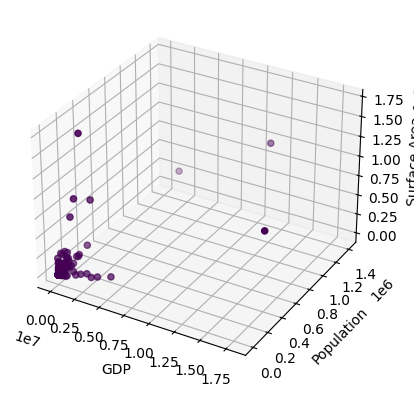

In [1]:



import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv(r'C:\Users\bessa\Downloads\archive\country_profile_variables.csv')
print(df.head())


selected_features = df[['GDP: Gross domestic product (million current US$)',
                        'Population in thousands (2017)',
                        'Surface area (km2)']]


selected_features = selected_features.apply(pd.to_numeric, errors='coerce').fillna(0)


n_clusters = 3  
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
df['cluster'] = spectral.fit_predict(selected_features)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(selected_features.iloc[:, 0], selected_features.iloc[:, 1], selected_features.iloc[:, 2], c=df['cluster'], cmap='viridis')
ax.set_xlabel('GDP')
ax.set_ylabel('Population')
ax.set_zlabel('Surface Area')
plt.show()



### Conclusion:
After using spectral clustering on the country dataset,
Grroups of countries with similar sizes in GDP, population, and surface area were found.
Each group has its own characteristics. Some share similar economic and population sizes. 
Countries that stand out from their groups, needing a closer look were also found. 
If the groups make sense, it means the clustering worked well. Other factors like politics or geography in each group can also be analyzed. 
These findings could help policymakers address common challenges or opportunities in specific clusters.


## ASSIGNMENT 2



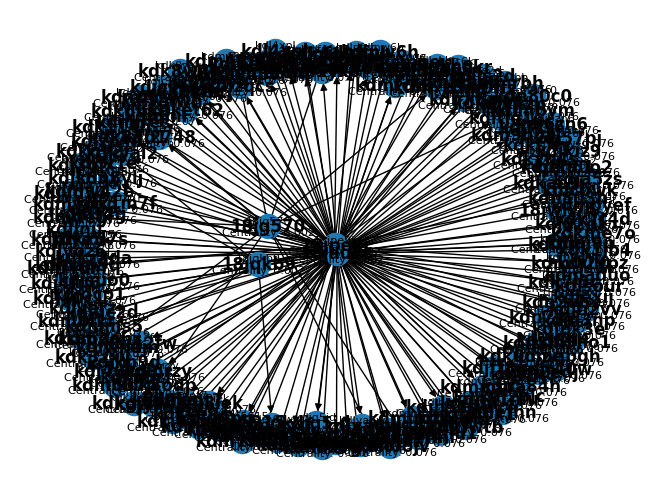

In [2]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id='veCauIU_Z2JrmaQlKYZwRA',
                     client_secret='lM8goQDr9BGTVUUhFlZfrYkkdQi8QQ',
                     user_agent='test/1.0 by besstmrr')

subreddit = reddit.subreddit('socialskills')

G = nx.DiGraph()

for submission in subreddit.hot(limit=5): 
    G.add_node(submission.id, type='submission', title=submission.title)
    for comment in submission.comments:
        if isinstance(comment, praw.models.Comment):
            G.add_node(comment.id, type='comment', body=comment.body)
            G.add_edge(submission.id, comment.id)

eigenvector_centrality = nx.eigenvector_centrality(G)

pos = nx.spring_layout(G, k=0.3)  
nx.draw(G, pos, with_labels=True, font_weight='bold')

labels = {node: f"{node}\nCentrality: {centrality:.3f}" for node, centrality in eigenvector_centrality.items()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.show()




### Conclusion:
The graph represents discussions in the 'r/socialskills' subreddit. 
Nodes, which can be either submissions or comments, show how different topics are connected. 
The size and color of nodes could indicate their importance, while clusters of nodes may highlight active discussions. 
The graph might reveal influential submissions that sparked a lot of talk or key contributors who shape discussions. 
Isolated nodes may represent less-discussed topics. 
The overall graph density can show how closely connected discussions are, indicating an engaged community. Remember, these insights come from assuming that eigenvector centrality reflects influence, and the actual context of the subreddit matters for a more accurate analysis. Experimenting with different visualizations and metrics could offer a more complete picture.